## Question	1	[KNN	Regressor,	20	Marks]

### I. Implement the KNN regressor	function:

               knn(train.data, train.label, test.data, K=3)

which takes	the	training data and their	labels (continuous values), the test set, and the size of the neighborhood (K). It should return the regressed values for the test data points.	Note that, you need to use a	 distance function to choose the neighbors. The	distance function used to measure the distance between a pair of data points is	Euclidean distance function.

In [1]:
# Load libraries
library(ggplot2)
library(reshape2)
library(corrplot)

# Load Data
data1.train <- read.csv('./Task1A_train.csv')
data1.test <- read.csv('./Task1A_test.csv')
data1.train <- as.matrix(data1.train)
data1.test <- as.matrix(data1.test)

In [2]:
#Create training and test subset
data1.train.data <- data1.train[, -2,drop=FALSE] # grab records, leave out the y (last column)
data1.train.label <- data1.train[, 2,drop=FALSE]
data1.test.data <- data1.test[, -2,drop=FALSE] # grab records, leave out the y (last column)
data1.test.label <- data1.test[, 2,drop=FALSE]

In [3]:
# Define the average function for KNN regression
ave <- function(x) {
    round(mean(x), 2)
}

In [4]:
# Refer to tutorial code 
# KNN function (Use euclidean distance here)
knn <- function(train.data, train.label, test.data, K=3){
    
  ## count number of train samples
  train.len <- nrow(train.data)
  
  ## count number of test samples
  test.len <- nrow(test.data)
  
  ## calculate distances between samples
  dist <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
  
  ## for each test sample...
  for (i in 1:test.len){
      
    ### ...find its K nearest neighbours from training sampels...
    nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
   
    ###... and calculate the predicted labels according to the mean value of K neighbours
    data1.test.label[i]<- ave(train.label[nn])
  }
  
  ## return the class labels as output
  return (data1.test.label)
}


### II. Plot the training and the testing errors versus	1/K for K=1,..,20 in one plot, using the Task1A_train.csv and Task1A_test.csv datasets provided for this assignment. Save the	 plot in your Jupyter Notebook file for	Question 1. Report	your	chosen error function in your Jupyter Notebook file.

In [5]:
# Calculate the train and test mean squared error for K in 1:20
mse <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
  mse[k,'train'] <- sum((knn(data1.train.data, data1.train.label, data1.train.data, K=k) - data1.train.label)^2)/nrow(data1.train.data)
  mse[k,'test'] <-  sum((knn(data1.train.data, data1.train.label, data1.test.data, K=k) - data1.test.label)^2)/nrow(data1.test.data)
}

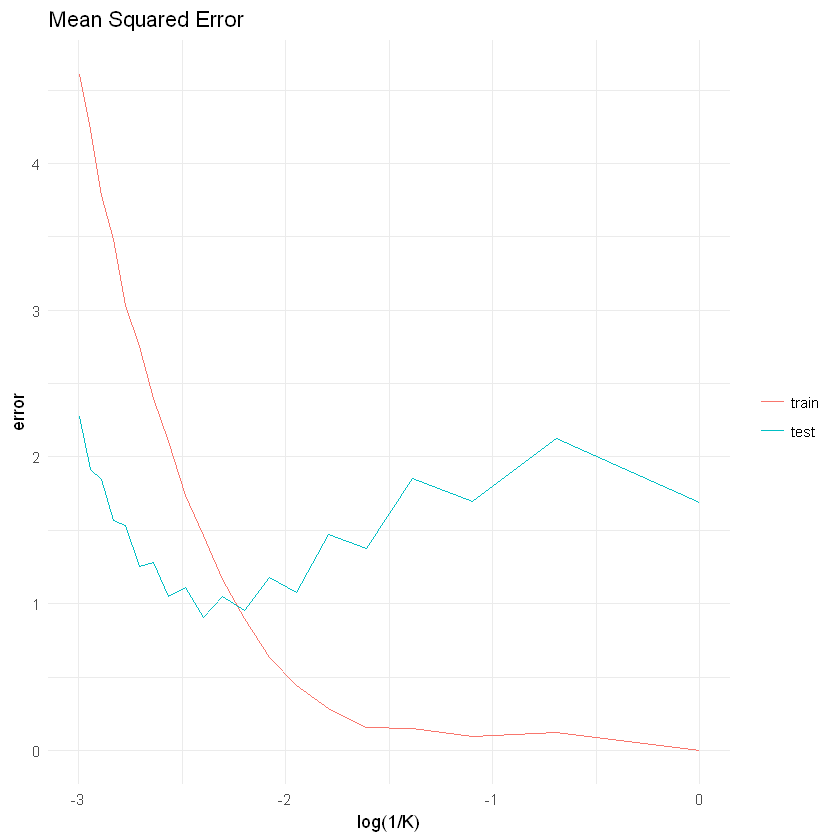

In [6]:
# Plot mean squared error of train and test data sets
mse.m <- melt(mse, id='K') # reshape for visualization
names(mse.m) <- c('K', 'type', 'error')
ggplot(data=mse.m, aes(x=log(1/K), y=error, color=type)) + geom_line() +
  scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
  ggtitle("Mean Squared Error")

### III. Report	(in	your Jupyter Notebook file)	the	optimum	value	 for K in terms of	the	testing	error. Discuss	the	values of K	corresponding to underfitting and overfitting based	on	your plot	in the previous part (Part II).

From the plot, we can see when log(1/k) is equal to -2.4，the test error reaches a low point. Therefore the optimal K is around 12.

We can also learn from the plot:
* In interval [-3, -2.4], both training and testing errors are declining. So in this interval, the model is underfitting.
* In interval [-2.4, 0], training error is still going down but testing error start increasing. Therefore, in this interval, the model is overfitting.